# Домашнє завдання №10

### Частина 1

Cтворення згорткової нейронної мережі, яка буде класифікувати товари із датасету fashion_mnist. Підбір гіперпараметрів

#### 1. Завантаження і підготовка даних

In [74]:
from tensorflow import keras

from keras.datasets import fashion_mnist
# датасет із зображеннями одягу та взуття, містить 60 000 тренувальних зображень і 10 000 тестових зображень розміром 28x28 пікселів, представляючи одяг у 10 різних класах

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization, Dropout

import numpy as np

import matplotlib.pyplot as plt

In [75]:
# Розпакування даних з load_data на тренувальні та тестові дані, а також відповідні мітки (labels)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [76]:
# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Для використання згорткової моделі додаємо один канал для кожного зображення, перетворюючи його в тривимірний обсяг (28, 28, 1)
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

#### 2. Модель №1

In [77]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28,28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# створюється 32 фільтри розміром (3,3), які рухаються по вхідному зображенню
# padding='same' вказує на додавання нулів до країв зображення, щоб зберегти розмір

# використовується пулінг з розміром (2, 2), що веде до зменшення розміру кожного зображення у два рази

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [78]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 3136)              0         
                                                                 
 dense_14 (Dense)            (None, 128)              

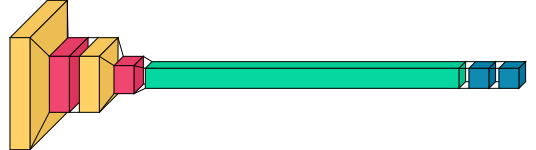

In [79]:
# Візуалізуємо шарову структуру моделі
!pip install visualkeras

import visualkeras

visualkeras.layered_view(model)

In [80]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

In [81]:
model_name = 'model_1'

history = model.fit(x_train, y_train, epochs=15, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
1500/1500 [==============================] - 78s 51ms/step - loss: 0.4130 - sparse_categorical_accuracy: 0.8530 - val_loss: 0.3075 - val_sparse_categorical_accuracy: 0.8878
Epoch 2/15
1500/1500 [==============================] - 64s 42ms/step - loss: 0.2798 - sparse_categorical_accuracy: 0.8977 - val_loss: 0.3066 - val_sparse_categorical_accuracy: 0.8864
Epoch 3/15
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2353 - sparse_categorical_accuracy: 0.9123 - val_loss: 0.2484 - val_sparse_categorical_accuracy: 0.9086
Epoch 4/15
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2028 - sparse_categorical_accuracy: 0.9252 - val_loss: 0.2471 - val_sparse_categorical_accuracy: 0.9125
Epoch 5/15
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1751 - sparse_categorical_accuracy: 0.9347 - val_loss: 0.2493 - val_sparse_categorical_accuracy: 0.9101
Epoch 6/15
1500/1500 [==============================] - 62s 41ms/step - loss: 0.

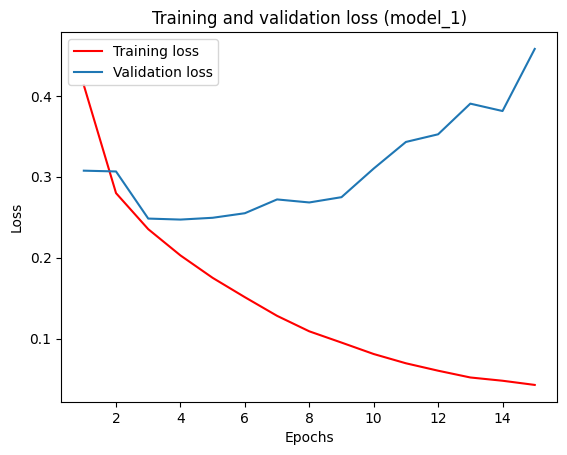

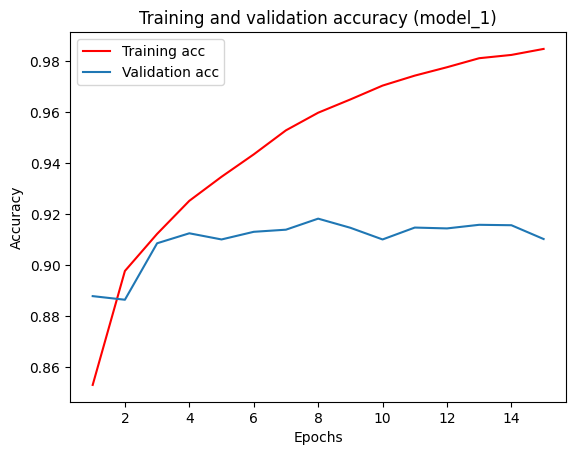

In [82]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['sparse_categorical_accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 2. Модель №2
В моделі №1 спостерігається перенавчання. Ускладнимо модель для вирішення цієї проблеми.

In [111]:
model = keras.Sequential()

model.add(Conv2D(32, (3, 3), padding='same',  activation='relu', kernel_initializer='he_normal', input_shape=(28,28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
# створюється 32 фільтри розміром (3,3), які рухаються по вхідному зображенню
# padding='same' вказує на додавання нулів до країв зображення, щоб зберегти розмір
# kernel_initializer='he_normal' - ініціалізує ваги шару так, що дисперсія вихідних значень активацій зберігається після проходження через шар
# використовується пулінг з розміром (2, 2), що веде до зменшення розміру кожного зображення у два рази

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

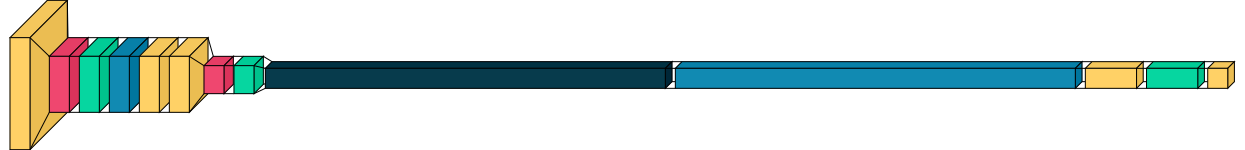

In [112]:
# Візуалізуємо шарову структуру моделі
visualkeras.layered_view(model)

In [113]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 batch_normalization_19 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_35 (Conv2D)          (None, 14, 14, 128)       36992     
                                                                 
 conv2d_36 (Conv2D)          (None, 14, 14, 128)     

In [116]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
    )

In [117]:
model_name = 'model_2'

history = model.fit(x_train, y_train,  batch_size=128, epochs=15, validation_split=0.2)

# Оцінка точності на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/15
375/375 [==============================] - 286s 754ms/step - loss: 0.5470 - sparse_categorical_accuracy: 0.8243 - val_loss: 0.4983 - val_sparse_categorical_accuracy: 0.8124
Epoch 2/15
375/375 [==============================] - 286s 764ms/step - loss: 0.3318 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.2886 - val_sparse_categorical_accuracy: 0.8940
Epoch 3/15
375/375 [==============================] - 287s 764ms/step - loss: 0.2864 - sparse_categorical_accuracy: 0.8944 - val_loss: 0.2360 - val_sparse_categorical_accuracy: 0.9133
Epoch 4/15
375/375 [==============================] - 287s 765ms/step - loss: 0.2584 - sparse_categorical_accuracy: 0.9043 - val_loss: 0.2348 - val_sparse_categorical_accuracy: 0.9133
Epoch 5/15
375/375 [==============================] - 287s 765ms/step - loss: 0.2414 - sparse_categorical_accuracy: 0.9111 - val_loss: 0.2271 - val_sparse_categorical_accuracy: 0.9162
Epoch 6/15
375/375 [==============================] - 294s 784ms/step - loss: 0.

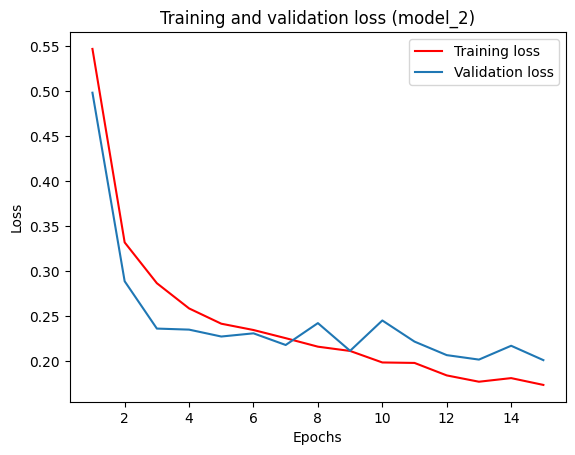

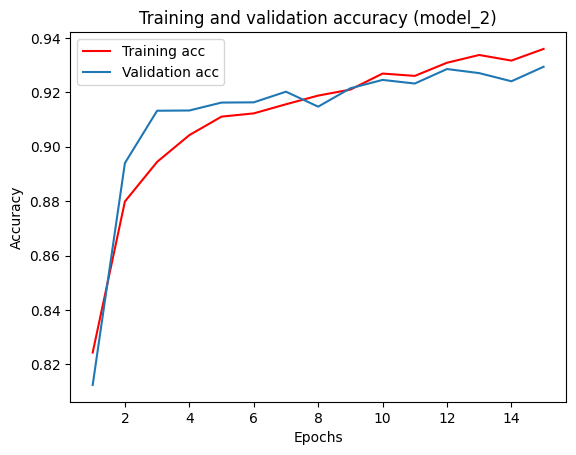

In [118]:
# Візуалізуємо результати навчання
import matplotlib.pyplot as plt


history_dict = history.history

epochs = range(1, len(history_dict['sparse_categorical_accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], label='Training loss', color="r")
plt.plot(epochs, history_dict['val_loss'], label='Validation loss')
plt.title(f'Training and validation loss ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['sparse_categorical_accuracy'], label='Training acc', color="r")
plt.plot(epochs, history_dict['val_sparse_categorical_accuracy'], label='Validation acc')
plt.title(f'Training and validation accuracy ({model_name})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Бачимо, що проблема перенавчання зникла. При необхідності, можна ще підвищити точність за рахунок збільшення кількості епох.